In [1]:
%load_ext autoreload
%autoreload 1
%aimport GeneralFunctions,plotting_functions

In [2]:
import numpy as np
from GeneralFunctions import (compute_eigensystem, hamiltonian_2QD_1HH_Lowest, compute_adiabatic_parameter, compute_parameters_interpolation,
	solve_system, hamiltonian_2QD_1HH_All)
from plotting_functions import modify_plot, save_figure,plot_letter
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
hbar=6.582*10**(-1) # Hbar (ueV*ns)
g=1.35 # g-factor fo the GaAs
muB=57.883 # Bohr magneton (ueV/T)
B=0.015 # Magnetic field applied (T)
ET = g * muB * B # Zeeman spliting (ueV)
print(ET)
l1 = 0.001 # Spin-flip tunneling (ueV)
l2 = 0.1 # Spin-flip tunneling (ueV)
tau = 0.25 # Sping-conserving (ueV)
u = 2000  #Intradot interaction (ueV)

1.1721307500000002


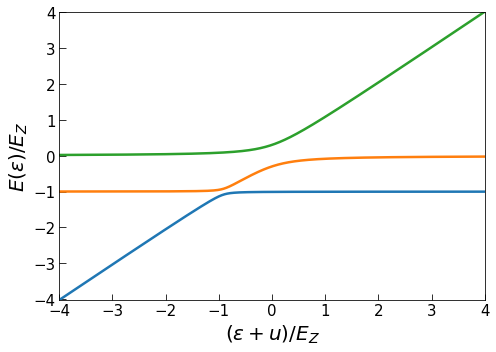

In [34]:
N = 2 ** 15 + 1
limit = 4
eps_vector = np.linspace(-limit, limit, N) * ET - u

parameters = [eps_vector, u, ET, tau, l1, l2]

labels=[r'$(\epsilon+u)/E_Z$',r'$E(\epsilon)/E_Z$']
legend=[r'$S(2,0)$',r'$T_-(1,1)$',r'$S(1,1)$']
# colors=['tab:blue','tab:orange','tab:red','tab:green','tab:purple']

energies, states,fig,ax = compute_eigensystem(parameters, hamiltonian_2QD_1HH_Lowest, plot=True, x_vector=(eps_vector + u) / ET,
                                       normalization=ET, labels=labels)
modify_plot(ax,fig=fig,figsize=[7,5],x_ticks_vector=np.arange(-4,5))
fig.tight_layout()

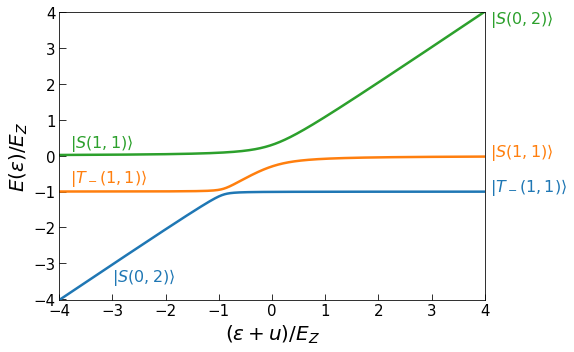

In [35]:
annotation_size=16

ax.text(4.1,3.7,r'$|S(0,2)\rangle$',{'color':'tab:green','fontsize':annotation_size})
ax.text(4.1,0,r'$|S(1,1)\rangle$',{'color':'tab:orange','fontsize':annotation_size})
ax.text(4.1,-1,r'$|T_-(1,1)\rangle$',{'color':'tab:blue','fontsize':annotation_size})

ax.text(-3,-3.5,r'$|S(0,2)\rangle$',{'color':'tab:blue','fontsize':annotation_size})
ax.text(-3.8,0.25,r'$|S(1,1)\rangle$',{'color':'tab:green','fontsize':annotation_size})
ax.text(-3.8,-0.75,r'$|T_-(1,1)\rangle$',{'color':'tab:orange','fontsize':annotation_size})


#lines=ax.lines
#lines[2].set_linestyle('--')
save_figure(fig,'eigenenergies_2QD_2HH_w_SOC',overwrite=True,device='desktop')
fig

In [6]:
factors, c_tilde = compute_adiabatic_parameter(eps_vector, states, energies, initial_state=1)
print('c_tilde =', c_tilde)

c_tilde = 3.7932351779503057


In [7]:
s, eps_sol = compute_parameters_interpolation(eps_vector, factors, c_tilde)

index_max = np.where((eps_sol + u) / ET > limit)[0][0]
s_mod = np.linspace(0, 1, index_max + 1)
eps_sol = interp1d(s_mod, eps_sol[:index_max + 1], kind='quadratic');

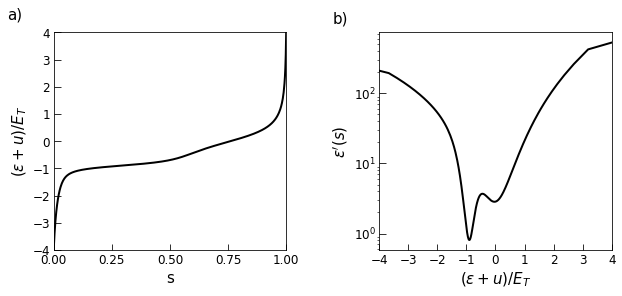

In [33]:
fig, [ax1,ax2] = plt.subplots(ncols=2)

ax1.plot(s_mod, (eps_sol(s_mod) + u) / ET,'k')
ax1.set_xlabel('s')
ax1.set_ylabel(r'$(\varepsilon+u)/E_T$')
ax1.set_xlim([0,1])
ax1.set_ylim([-4,4])
ax1.text(-0.20,4.5,'a)',{'fontsize':15})
modify_plot(ax1,y_ticks_vector=np.arange(-4,4+1), x_ticks_vector=np.linspace(0,1,5, endpoint=True), label_size=15,
            tick_label_size=12, lines_width=2)

ax2.plot((eps_sol(s_mod)+u)/ET,np.gradient(eps_sol(s_mod),s_mod),'k')
ax2.set_yscale('log')
ax2.set_xlabel(r'$(\varepsilon+u)/E_T$')
ax2.set_ylabel(r'$\varepsilon^\prime(s)$')
ax2.set_xlim([-4,4])
ax2.text(-5.6,10**3,'b)',{'fontsize':15})
modify_plot(ax2,fig=fig,x_ticks_vector=np.arange(-4,4+1), figsize=[10,4], label_size=15, tick_label_size=12,lines_width=2)

fig.subplots_adjust(wspace=0.4)

save_figure(fig,'FAQUAD_detuning_2QD_2HH',overwrite=True,device='desktop');

In [16]:
n_tf = 100
tf_vec = np.linspace(0.1, 100, n_tf)
Prob = np.zeros([1000, 3, n_tf])

density0 = np.zeros([3, 3], dtype=complex)  # Initialize the variable to save the density matrix
density0[0, 0] = 1  # Initially the only state populated is the triplet (in our basis the first state)

for i in range(0, n_tf):
    t = np.linspace(0, tf_vec[i], 1000)
    _, Prob[:, :, i] = solve_system(t, density0, [eps_sol, u, ET, tau, l1, l2], hamiltonian_2QD_1HH_Lowest, prob=True,
                                    normalization=tf_vec[i])

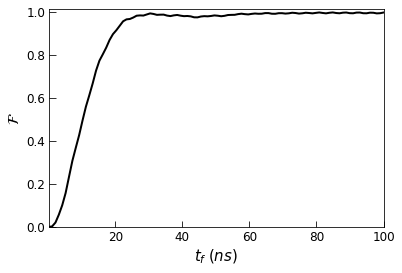

In [32]:
fig = plt.figure()  # Plot the fidelty to populate the hibrid singlet state
ax = fig.add_subplot(1, 1, 1)
ax.plot(tf_vec, Prob[-1, 1, :],'k')
ax.set_xlim(tf_vec[0], tf_vec[-1])
ax.set_ylim(0, 1.01)
ax.set_xlabel(r'$t_f\; (ns)$')
ax.set_ylabel(r'$\mathcal{F}$')
modify_plot(ax, label_size=15, tick_label_size=12, lines_width=2)

save_figure(fig,'FAQUAD_2QD_Results',overwrite=True,device='desktop');

In [25]:
index=np.where(Prob[-1,1,:]==np.max(Prob[-1,1,0:50]))[0][0] # Index where the maximun fidelity have been reached
print(tf_vec[index]) # Time for the maximun fidelity (ns)
print(Prob[-1,1,index])
t=np.linspace(0,tf_vec[index],1000)

30.37272727272727
0.9917211141236562


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


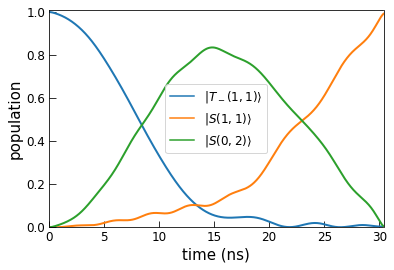

In [31]:
fig=plt.figure() #Plot the population for each state in terms of time
ax=fig.add_subplot(1,1,1)
ax.plot(t,Prob[:,0,index],label=r'$|T_-(1,1)\rangle$')
ax.plot(t,Prob[:,1,index],label=r'$|S(1,1)\rangle$')
ax.plot(t,Prob[:,2,index],label=r'$|S(0,2)\rangle$')
ax.legend()
ax.set_xlabel('time (ns)')
ax.set_ylabel('population')
ax.set_xlim([0,t[-1]])
ax.set_ylim([0,1.01])

modify_plot(ax, label_size=15, tick_label_size=12, lines_width=2, legend=True, legend_size=12)

save_figure(fig,'states_evolution',overwrite=True,device='desktop');